In [1]:
import numpy as np
import matplotlib.pyplot as plt

from dataloader import split_train_val, section_loader, section_loader_ts

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

In [2]:
# generate splits
split_train_val()

### Load dataset throught generator

In [4]:
val_loader_i = section_loader(direct = 'i',split = 'val')
val_loader_x = section_loader(direct = 'x',split = 'val')

In [5]:
for batch in val_loader_i.generator():
    x1, y1 = batch
    print(x1.shape, y1.shape)
    
    break

(688, 256, 1) (688, 256, 6)


In [6]:
for batch in val_loader_x.generator():
    x2, y2 = batch
    print(x2.shape, y2.shape)
    
    break

(400, 256, 1) (400, 256, 6)


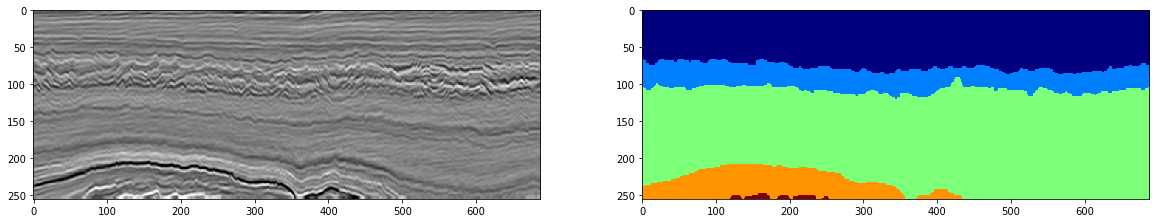

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,4))
axs[0].imshow(x1[:,:,0].T, cmap='gray')
axs[1].imshow(np.argmax(y1,axis=-1).T, cmap='jet')
plt.show()

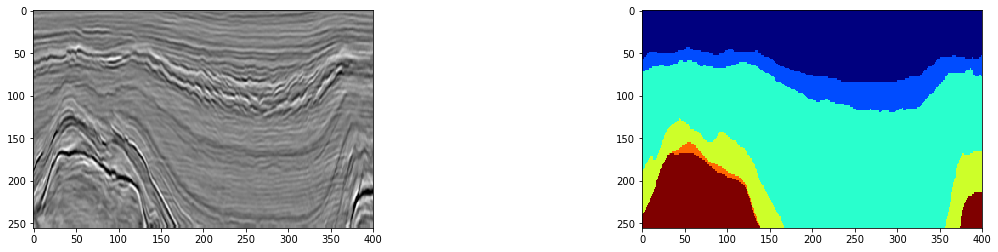

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,4))
axs[0].imshow(x2[:,:,0].T, cmap='gray')
axs[1].imshow(np.argmax(y2,axis=-1).T, cmap='jet')
plt.show()

### Timeseries generator

In [2]:
val_loader_i_ts = section_loader_ts(direct = 'i',split = 'val', window=5)

In [3]:
for batch in val_loader_i_ts.generator():
    x1, y1 = batch
    print(x1.shape, y1.shape)
    break

(5, 688, 256, 1) (688, 256, 6)


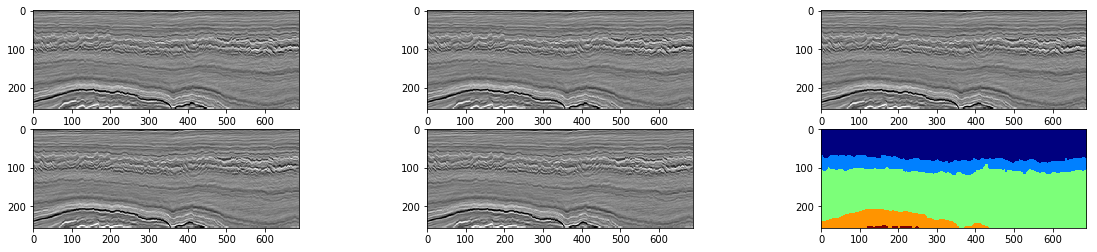

In [5]:
n_cols=3

fig, axs = plt.subplots(nrows=2, ncols=n_cols, figsize=(20,4))
for idx in range(6):
    if idx != 5:
          axs[idx//n_cols, idx%n_cols].imshow(x1[idx,:,:,0].T, cmap='gray')
    else:
          axs[idx//n_cols, idx%n_cols].imshow(np.argmax(y1,axis=-1).T, cmap='jet')

In [115]:
hs = model.fit_generator(train_gen,epochs=5,
                    steps_per_epoch=num_train//bs,
#                     callbacks=cb,
                    validation_data=val_gen, validation_steps=num_val//bs,
                    verbose = 1, workers = 0)

Epoch 1/5
762/762 [==============================] - 1179s 2s/step - loss: 1.0768 - acc: 0.5932 - val_loss: 0.8252 - val_acc: 0.7047
Epoch 2/5
762/762 [==============================] - 1188s 2s/step - loss: 0.7532 - acc: 0.7358 - val_loss: 0.7086 - val_acc: 0.7528
Epoch 3/5
762/762 [==============================] - 1196s 2s/step - loss: 0.6707 - acc: 0.7666 - val_loss: 0.6666 - val_acc: 0.7661
Epoch 4/5
762/762 [==============================] - 1205s 2s/step - loss: 0.6126 - acc: 0.7881 - val_loss: 0.5834 - val_acc: 0.7986
Epoch 5/5
762/762 [==============================] - 1206s 2s/step - loss: 0.5687 - acc: 0.8050 - val_loss: 0.5506 - val_acc: 0.8113
